In [153]:
import gurobi as gp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [165]:
#Q1
model=gp.Model()
name_of_swimmer = ['N','M','L','A','C']
swimming_style = ['BA','BR','BU','FR']
table_of_swim = {('BA','N'):40.1,('BR','N'):41.7,('BU','N'):41.1, ('FR','N'):33.3,
        ('BA','M'):39.6,('BR','M'):37.6,('BU','M'):31.9,('FR','M'):31.2,
        ('BA','L'):35.3,('BR','L'):37.9,('BU','L'):36.2,('FR','L'):33.1,
        ('BA','A'):30.6,('BR','A'):34.1,('BU','A'):33.3,('FR','A'):29.1,
        ('BA','C'):36.9,('BR','C'):37.2,('BU','C'):29, ('FR','C'):31.6}

gurobi_swim=model.addVars(table_of_swim, vtype=gp.GRB.BINARY, obj=table_of_swim, name= "Name Swims Style:")
for a in swimming_style:
    model.addConstr(gp.quicksum(gurobi_swim[a,b] for b in name_of_swimmer) == 1)
for d in name_of_swimmer:
    model.addConstr(gp.quicksum(gurobi_swim[c,d] for c in swimming_style) <= 1)
model.ModelSense=gp.GRB.MINIMIZE

model.optimize()
model.printAttr("X")
print("Total Time to Complete All Races", model.objval)

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 9 rows, 20 columns and 40 nonzeros
Model fingerprint: 0x0c35683c
Variable types: 0 continuous, 20 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 4e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 136.3000000
Presolve time: 0.00s
Presolved: 9 rows, 20 columns, 40 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)
Found heuristic solution: objective 135.8000000

Root relaxation: objective 1.287000e+02, 8 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0               0     128.7000000  128.70000  0.00%     -    0s

Explored 1 nodes (8 simplex iteratio

Expected Revenue: 31290.42
Optimal Limit: 46


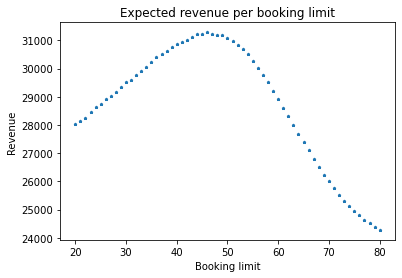

In [173]:
#Q2A
n = 10000
p1 = 150
p2 = 500

# creating the limit range from 20-80
limit = np.arange(20, 81)
all_revenues = []

# looping over every booking limit
for current_limit in limit:
    p1_number_customers = np.random.poisson(lam = 75, size = n)
    p2_number_customers = np.random.poisson(lam = 50, size = n)
   
    revenues_temp = []
   
    for i in range(n):
        if current_limit <= p1_number_customers[i]:
            p1_number_tickets = current_limit
        else:
            p1_number_tickets = p1_number_customers[i]
        remaining_tickets = 100 - p1_number_tickets
        if remaining_tickets <= p2_number_customers[i]:
            p2_number_tickets = remaining_tickets
        else:
            p2_number_tickets = p2_number_customers[i]
       
        current_revenue = p1*p1_number_tickets + p2*p2_number_tickets
        revenues_temp.append(current_revenue)
   
    all_revenues.append(np.mean(revenues_temp))

# plot of the expected revenue as a function of the booking limit
plt.plot(limit, all_revenues, '*', markersize = 3)
plt.title('Expected revenue per booking limit')
plt.xlabel('Booking limit')
plt.ylabel('Revenue')

print('Expected Revenue:', max(all_revenues))
print('Optimal Limit:', limit[all_revenues.index(max(all_revenues))])

Expected Revenue: 31307.1465
Optimal Limit: 47
Optimal Limit and Compensation Combo: [47, 155]


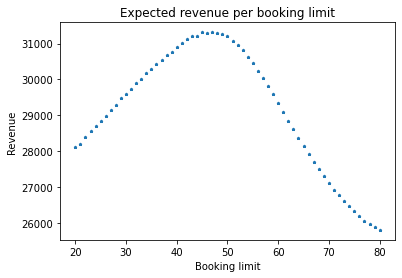

In [177]:
#Q2B
n = 10000
p1 = 150
p2 = 500

limit = np.arange(20, 81)
possible_compensation = np.arange(150, 301)

all_revenues = []
huge_dictionary={}

for current_limit in limit:
    combo_avg = []
    dictionary_for_current_limit={}
    for current_compensation in possible_compensation:
        p1_number_customers = np.random.poisson(lam = 75, size = n)
        p2_number_customers = np.random.poisson(lam = 50, size = n)
        current_combo=[current_limit,current_compensation]
        temp=[] 
        for i in range(n):
            if current_limit <= p1_number_customers[i]:
                p1_number_tickets = current_limit
            else:
                p1_number_tickets = p1_number_customers[i]
            refund_customers = np.random.binomial(p1_number_tickets, (current_compensation - 150)/150)
            remaining_tickets = (p1_number_tickets-100)*(-1)
            if remaining_tickets <= p2_number_customers[i]:
                if refund_customers >= (p2_number_customers[i] - remaining_tickets):
                    refund_tickets = p2_number_customers[i] - remaining_tickets
                    p2_number_tickets = remaining_tickets
                    p1_number_tickets = p1_number_tickets - refund_tickets
                else:
                    refund_tickets = refund_customers
                    p2_number_tickets = remaining_tickets + refund_customers
                    p1_number_tickets = p1_number_tickets - refund_tickets
                current_revenue = (p1*p1_number_tickets)+ (p2*p2_number_tickets) - (current_compensation*refund_tickets)
            else:
                p2_number_tickets = p2_number_customers[i]
                current_revenue = p1*p1_number_tickets + p2*p2_number_tickets
#bookkeeping of relevant info               
            temp.append(current_revenue)
        combo_avg.append(np.mean(temp))
        dictionary_for_current_limit[np.mean(temp)]=current_combo
    all_revenues.append(max(combo_avg))
    huge_dictionary[max(combo_avg)]=dictionary_for_current_limit[max(combo_avg)]

plt.plot(limit, revenues, '*', markersize = 3)
plt.title('Expected revenue per booking limit')
plt.xlabel('Booking limit')
plt.ylabel('Revenue')

print('Expected Revenue:', max(all_revenues))
print('Optimal Limit:', limit[all_revenues.index(max(all_revenues))])
print("Optimal Limit and Compensation Combo:",huge_dictionary[max(all_revenues)])

In [156]:
#Q3A
model = gp.Model()

#create the total_produced variable
total_produced=model.addVar(lb=0,name="total_produced")

#transport costs
PF_A_cost=1
PF_B_cost=1.5

A_1_cost=1.5
A_2_cost=2
A_3_cost=2
A_4_cost=3

B_1_cost=2
B_2_cost=1.2
B_3_cost=1.1
B_4_cost=2.5

#create demands for scenarios
scenario_a_demand_1=5000
scenario_a_demand_2=3000
scenario_a_demand_3=7800
scenario_a_demand_4=4000
total_demand_a=scenario_a_demand_1+scenario_a_demand_2+scenario_a_demand_3+scenario_a_demand_4

scenario_b_demand_1=3000
scenario_b_demand_2=1000
scenario_b_demand_3=6000
scenario_b_demand_4=3000
total_demand_b=scenario_b_demand_1+scenario_b_demand_2+scenario_b_demand_3+scenario_b_demand_4

scenario_c_demand_1=4200
scenario_c_demand_2=4100
scenario_c_demand_3=3000
scenario_c_demand_4=5400
total_demand_c=scenario_c_demand_1+scenario_c_demand_2+scenario_c_demand_3+scenario_c_demand_4

##SCENARIO A

#create warehouse to DC variables for scenario a
Ato1_a=model.addVar(name="Ato1_a")
Ato2_a=model.addVar(name="Ato2_a")
Ato3_a=model.addVar(name="Ato3_a")
Ato4_a=model.addVar(name="Ato4_a")

Bto1_a=model.addVar(name="Bto1_a")
Bto2_a=model.addVar(name="Bto2_a")
Bto3_a=model.addVar(name="Bto3_a")
Bto4_a=model.addVar(name="Bto4_a")

#DC can't receive more than it wants
model.addConstr(Ato1_a+Bto1_a<=scenario_a_demand_1)
model.addConstr(Ato2_a+Bto2_a<=scenario_a_demand_2)
model.addConstr(Ato3_a+Bto3_a<=scenario_a_demand_3)
model.addConstr(Ato4_a+Bto4_a<=scenario_a_demand_4)

#the amout send from FM to warehouse is equal to amount delivered to DC and making sure it is not more than total produced
PFtoA_a=model.addVar(name="PFtoA_a")
model.addConstr((Ato1_a+Ato2_a+Ato3_a+Ato4_a)==PFtoA_a)
PFtoB_a=model.addVar(name="PFtoB_a")
model.addConstr((Bto1_a+Bto2_a+Bto3_a+Bto4_a)==PFtoB_a)
model.addConstr(PFtoA_a+PFtoB_a<=total_produced)

#creating transport costs for a

total_transport_cost_a=model.addVar(name="total_transport_cost_a")
total_transport_cost_a=A_1_cost*Ato1_a+A_2_cost*Ato2_a+A_3_cost*Ato3_a+A_4_cost*Ato4_a+PFtoA_a*PF_A_cost+B_1_cost*Bto1_a+B_2_cost*Bto2_a+B_3_cost*Bto3_a+B_4_cost*Bto4_a+PFtoB_a*PF_B_cost

##SCENARIO B

#create warehouse to DC variables for scenario a
Ato1_b=model.addVar(name="Ato1_b")
Ato2_b=model.addVar(name="Ato2_b")
Ato3_b=model.addVar(name="Ato3_b")
Ato4_b=model.addVar(name="Ato4_b")

Bto1_b=model.addVar(name="Bto1_b")
Bto2_b=model.addVar(name="Bto2_b")
Bto3_b=model.addVar(name="Bto3_b")
Bto4_b=model.addVar(name="Bto4_b")

#DC can't receive more than it wants
model.addConstr(Ato1_b+Bto1_b<=scenario_b_demand_1)
model.addConstr(Ato2_b+Bto2_b<=scenario_b_demand_2)
model.addConstr(Ato3_b+Bto3_b<=scenario_b_demand_3)
model.addConstr(Ato4_b+Bto4_b<=scenario_b_demand_4)

#the amout send from FM to warehouse is equal to amount delivered to DC and making sure it is not more than total produced
PFtoA_b=model.addVar(name="PFtoA_b")
model.addConstr((Ato1_b+Ato2_b+Ato3_b+Ato4_b)==PFtoA_b)
PFtoB_b=model.addVar(name="PFtoB_b")
model.addConstr((Bto1_b+Bto2_b+Bto3_b+Bto4_b)==PFtoB_b)
model.addConstr(PFtoA_b+PFtoB_b<=total_produced)

#creating transport costs for b

total_transport_cost_b=model.addVar(name="total_transport_cost_b")
total_transport_cost_b=A_1_cost*Ato1_b+A_2_cost*Ato2_b+A_3_cost*Ato3_b+A_4_cost*Ato4_b+PFtoA_b*PF_A_cost+B_1_cost*Bto1_b+B_2_cost*Bto2_b+B_3_cost*Bto3_b+B_4_cost*Bto4_b+PFtoB_b*PF_B_cost

##SCENARIO C

#create warehouse to DC variables for scenario a
Ato1_c=model.addVar(name="Ato1_c")
Ato2_c=model.addVar(name="Ato2_c")
Ato3_c=model.addVar(name="Ato3_c")
Ato4_c=model.addVar(name="Ato4_c")

Bto1_c=model.addVar(name="Bto1_c")
Bto2_c=model.addVar(name="Bto2_c")
Bto3_c=model.addVar(name="Bto3_c")
Bto4_c=model.addVar(name="Bto4_c")

#DC can't receive more than it wants
model.addConstr(Ato1_c+Bto1_c<=scenario_c_demand_1)
model.addConstr(Ato2_c+Bto2_c<=scenario_c_demand_2)
model.addConstr(Ato3_c+Bto3_c<=scenario_c_demand_3)
model.addConstr(Ato4_c+Bto4_c<=scenario_c_demand_4)

#the amout send from FM to warehouse is equal to amount delivered to DC and making sure it is not more than total produced
PFtoA_c=model.addVar(name="PFtoA_c")
model.addConstr((Ato1_c+Ato2_c+Ato3_c+Ato4_c)==PFtoA_c)
PFtoB_c=model.addVar(name="PFtoB_c")
model.addConstr((Bto1_c+Bto2_c+Bto3_c+Bto4_c)==PFtoB_c)
model.addConstr(PFtoA_c+PFtoB_c<=total_produced)

#creating transport costs for c

total_transport_cost_c=model.addVar(name="total_transport_cost_c")
total_transport_cost_c=A_1_cost*Ato1_c+A_2_cost*Ato2_c+A_3_cost*Ato3_c+A_4_cost*Ato4_c+PFtoA_c*PF_A_cost+B_1_cost*Bto1_c+B_2_cost*Bto2_c+B_3_cost*Bto3_c+B_4_cost*Bto4_c+PFtoB_c*PF_B_cost

##END

profit_a=model.addVar(name="profit_a")
profit_b=model.addVar(name="profit_b")
profit_c=model.addVar(name="profit_c")

profit_a=((PFtoA_a+PFtoB_a)*30)-(total_produced*10)-(total_transport_cost_a)
profit_b=((PFtoA_b+PFtoB_b)*30)-(total_produced*10)-(total_transport_cost_b)
profit_c=((PFtoA_c+PFtoB_c)*30)-(total_produced*10)-(total_transport_cost_c)

profits={0.3:profit_a,
         0.2:profit_b,
         0.5:profit_c}

probabilities=[0.3,0.2,0.5]

model.setObjective(gp.quicksum(p*(profits[p]) for p in probabilities),gp.GRB.MAXIMIZE)

model.optimize()
print("expected profit", model.objval)
model.printAttr("X")

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (mac64[x86])
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 21 rows, 37 columns and 63 nonzeros
Model fingerprint: 0x90d9cd83
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-01, 1e+01]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+03, 8e+03]
Presolve removed 20 rows and 32 columns
Presolve time: 0.03s
Presolved: 1 rows, 5 columns, 5 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.9545500e+05   2.087500e+03   0.000000e+00      0s
       1    2.6541100e+05   0.000000e+00   0.000000e+00      0s

Solved in 1 iterations and 0.05 seconds (0.00 work units)
Optimal objective  2.654110000e+05
expected profit 265411.0

    Variable            X 
-------------------------
total_produced        16700 
      Ato1_a         5000 
      Ato4_a          900 
      Bto2_a         3000 
      Bto3_a         7800 
     PFtoA_